# Basic Data Cleaning in NLP

In [57]:
!pip install nltk

## NLP Libraries Used:
- re
- string
- nltk
- spacy
- sklearn
- gensim
- huggingface

## Lowercase and Remove Special Characters

In [58]:
import re

text = "Hello, World! Welcome to our AIR LLM ENGINEERING COURSE."
print("Original text:", text)
cleaned_text = text.lower()  # Lowercasing
cleaned_text = re.sub(r'[^a-z\s]', '', cleaned_text)  # Remove special characters
print("Cleaned Text:", cleaned_text)


Original text: Hello, World! Welcome to our AIR LLM ENGINEERING COURSE.
Cleaned Text: hello world welcome to our air llm engineering course


- Lowercasing: Converts all characters to lowercase to ensure case uniformity.
- Remove Special Characters: Uses re.sub() to replace all non-alphabetic characters with empty strings.

- re.sub(): This is a function from the re module (regular expressions) in Python. It's used for substituting parts of a string that match a given pattern.
-r'': This denotes a raw string, which is often used for regular expressions to avoid issues with backslashes.
- [^a-z\s]: This is the core of the pattern.
- []: This defines a character set.
- ^: Inside a character set, this means "not".
- a-z: This matches any lowercase letter.
- \s: This matches any whitespace character (spaces, tabs, newlines).
- Therefore, [^a-z\s] means "match any character that is NOT a lowercase letter or whitespace".
- '': This is the replacement string. In this case, it's an empty string, which means any matched characters will be replaced with nothing (effectively removed).
- cleaned_text: This is the input string where the substitution will be performed, and the result will be stored back into the same variable.

Let's take a deeper dive into regex...

#### Introduction to Regex

**Regex (short for regular expressions)** is a sequence of characters used to define search patterns, typically for string-matching tasks. It’s a powerful tool in text processing that allows users to find, extract, and manipulate patterns in text.

Regular expressions, or regex, are powerful tools for pattern matching and text manipulation. They provide a concise way to search, extract, and modify strings based on specific patterns.

***Key components of regex:***
- Character sets: Define a set of possible characters (e.g., [a-z] for all lowercase letters).
- Special characters: Provide extra functionality (e.g., \d for digits, \s for whitespace).
- Quantifiers: Control how many times a pattern is matched (e.g., * for 0 or more matches).

In [59]:
## Basic Regex Examples

# Sample text
text = "The quick brown fox jumps over the lazy dog. The dog barks 3 times."
print("Original text:", text)

# Basic pattern matching
pattern = r"fox"
match = re.search(pattern, text)
print(f"Found '{pattern}' at index: {match.start() if match else 'Not found'}")

# Using quantifiers and character classes
pattern = r"\b\w{5}\b"  # Find 5-letter words
words = re.findall(pattern, text)
print(f"5-letter words: {words}")
"""
- \b: This is called a word boundary.
It is a zero-width assertion that matches the position between a word character (\w) and a non-word character.
Word boundaries are useful when you want to match whole words and avoid partial matches.
In this pattern, there are two word boundaries: one at the beginning and one at the end.

- \w: This matches any word character, which includes letters, digits, and the underscore character (_).
Specifically, \w is equivalent to the character set [a-zA-Z0-9_].

- {5}: This is a quantifier specifying exactly five occurrences of the preceding token.
In this pattern, it tells the regex engine to match exactly five word characters.
"""

# Capturing groups
pattern = r"(\w+) (\w+)"
matches = re.findall(pattern, text)
print(f"Word pairs: {matches}")

"""
The pattern r"(\w+) (\w+)" matches two consecutive words separated by a single space, capturing each word separately:

(\w+): Captures one or more word characters (letters, digits, or underscores).
(space): Matches a single space between the words.
(\w+): Captures the second word (again, one or more word characters).
In essence, it captures pairs of words like "Hello World" or "test string".
"""

# Substitution
pattern = r"dog"
replacement = "cat"
new_text = re.sub(pattern, replacement, text)
print(f"After substitution: {new_text}")

"""
Pattern: r"dog"
Replacement: "cat"
Explanation: Replaces all occurrences of "dog" in text with "cat".
"""

# Splitting text
pattern = r"\W"  # Split on whitespace
words = re.split(pattern, text)
print(f"Words: {words}")


"""
Pattern: r"\s+" (one or more whitespace characters)
Explanation: Splits text into a list of words based on spaces, tabs, or newlines.
"""


Original text: The quick brown fox jumps over the lazy dog. The dog barks 3 times.
Found 'fox' at index: 16
5-letter words: ['quick', 'brown', 'jumps', 'barks', 'times']
Word pairs: [('The', 'quick'), ('brown', 'fox'), ('jumps', 'over'), ('the', 'lazy'), ('The', 'dog'), ('barks', '3')]
After substitution: The quick brown fox jumps over the lazy cat. The cat barks 3 times.
Words: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '', 'The', 'dog', 'barks', '3', 'times', '']


<>:18: SyntaxWarning: invalid escape sequence '\w'
<>:35: SyntaxWarning: invalid escape sequence '\w'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\w'
<>:35: SyntaxWarning: invalid escape sequence '\w'
<>:62: SyntaxWarning: invalid escape sequence '\s'
C:\Users\office27\AppData\Local\Temp\ipykernel_17884\1592429597.py:18: SyntaxWarning: invalid escape sequence '\w'
  It is a zero-width assertion that matches the position between a word character (\w) and a non-word character.
C:\Users\office27\AppData\Local\Temp\ipykernel_17884\1592429597.py:35: SyntaxWarning: invalid escape sequence '\w'
  The pattern r"(\w+) (\w+)" matches two consecutive words separated by a single space, capturing each word separately:
C:\Users\office27\AppData\Local\Temp\ipykernel_17884\1592429597.py:62: SyntaxWarning: invalid escape sequence '\s'
  Pattern: r"\s+" (one or more whitespace characters)


'\nPattern: r"\\s+" (one or more whitespace characters)\nExplanation: Splits text into a list of words based on spaces, tabs, or newlines.\n'

- ^ Start of string, or start of line in multi-line pattern
- \A Start of string
- $ End of string, or end of line in multi-line pattern
- \Z End of string
- \b Word boundary
- \B Not word boundary
- \< Start of word
- \> End of word

[Regex Cheat Sheet](https://cheatography.com/davechild/cheat-sheets/regular-expressions/)

- Substitution: re.sub() replaces all occurrences of 'dog' with 'cat'.
- Splitting: re.split() splits the text into a list of words based on whitespace.

## Remove Punctuation

In [60]:
import string

text = "Hello, World! Welcome to NLP."
cleaned_text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation, although personally I think this is the least intuitive way to do this
print(cleaned_text)


Hello World Welcome to NLP


The string module in Python provides a collection of useful constants, classes, and functions for string manipulation. Common constants include:
- string.ascii_letters: Contains all lowercase and uppercase letters ('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ').
- string.digits: Contains digit characters ('0123456789').
- string.punctuation: Contains all standard punctuation characters.

Use Case: It simplifies operations like removing punctuation, accessing common character sets, or creating customized string processing functions.

The str.maketrans() function in Python is used to create a mapping table, which specifies how different characters in a string should be replaced or translated. The function returns a dictionary-like table where each character in the first argument is mapped to the corresponding character in the second argument.

- string.punctuation: A predefined constant in the string module that includes all common punctuation characters (!"#$%&'()*+,-./:;<=>?@[\]^_{|}~`).
- str.maketrans('', '', string.punctuation): Creates a translation table that maps each punctuation character to None, effectively removing them.
- text.translate(...): Uses the translation table to remove all punctuation characters from text.

1. string.punctuation: This is a built-in constant in Python's string module. It contains a string of all the standard punctuation characters: !"#$%&'()*+,-./:;<=>?@[\]^_{|}~
2. str.maketrans('', '', string.punctuation): This part creates a translation table using the maketrans() method.
The first two arguments are empty strings ('', '') because we're not replacing any characters with others.
The third argument is string.punctuation. This tells the maketrans() method to map all the punctuation characters to None, effectively removing them during the translation process.
3. text.translate(...): This is where the actual cleaning happens. The translate() method takes the translation table you created and applies it to the text string.
It removes all the characters specified in the translation table (the punctuation marks).

## Tokenization and Stopword Removal

Tokenization is the process of breaking down a text into smaller units called tokens. These tokens can be words, subwords, or sentences, depending on the type of tokenization used. In NLP, tokenization is essential because it allows machines to understand text by turning a long string of characters into individual components that can be processed for tasks like text analysis, machine learning, or translation.

- Tokenization: Breaks down text into individual tokens (words).

#### NLTK Library
[NLTK (Natural Language Toolkit)](https://www.nltk.org/) is a powerful, open-source Python library used for natural language processing (NLP) and computational linguistics. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet, along with various tools for text processing, tokenization, stemming, lemmatization, and more.

Key Features:
- Tokenization: Breaking down text into words, sentences, or subwords.
- Text Cleaning: Removing stopwords, punctuation, or special characters.
- Stemming and Lemmatization: Reducing words to their root or base forms.
- Part-of-Speech Tagging: Identifying the grammatical parts of speech (e.g., nouns, verbs).
- Named Entity Recognition (NER): Identifying named entities like people, locations, and organizations in text.
- Text Classification: Using machine learning models to classify text into categories.
- Corpora and Lexical Resources: Access to large text corpora and lexical resources such as WordNet, Gutenberg, and Brown corpus.

Advantages of NLTK:
- Suitable for beginners and educational purposes due to its comprehensive documentation and ease of use.
- Includes many corpora and pre-built datasets, allowing researchers and developers to experiment quickly.
- Supports complex NLP tasks like parsing, chunking, and semantic analysis.

Resources:
- Official NLTK Documentation: [NLTK Documentation](https://www.nltk.org/)
- NLTK Book: [NLTK Book](https://www.nltk.org/book/) - A comprehensive guide to using NLTK for various NLP tasks.
- API Reference: [NLTK API Reference](https://www.nltk.org/api/nltk.html)

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt') # Download the 'punkt' tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords') # Download the WordNet lexical database

text = "AIR's LLM Engineering Course is the best, and I am having a great time today!"
tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
stop_words = set(stopwords.words('english'))
print(stop_words)
filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

print("Original Text:", text)
print("Filtered tokens:", filtered_tokens)


{'having', 've', 'to', 'this', 'those', 'does', 'ourselves', 'me', "didn't", 'can', 'yourselves', 'they', 'has', "we're", 'doesn', 'over', "hasn't", 'when', 'ain', "she'll", "it's", 'what', 'aren', 'don', 'some', "weren't", "needn't", "couldn't", 'out', 'ma', 'but', 'his', 'very', 'any', 'hadn', 'a', 'that', 'isn', 'such', "aren't", 'them', 'themselves', 'then', 'if', 'under', 'again', 'whom', 'had', 'its', 'should', 're', "it'd", "don't", 'itself', 'shan', 'wasn', "shouldn't", "wasn't", 'were', 'after', 'during', 's', "we've", "you've", "he's", 'mightn', "isn't", 'at', 'is', 't', 'yourself', 'm', 'weren', 'between', 'because', 'on', 'your', 'i', 'hasn', "shan't", 'he', 'in', 'nor', 'only', "they're", "she's", 'above', 'below', "haven't", "you're", 'all', 'and', "should've", "wouldn't", 'own', 'up', 'we', "mightn't", 'where', 'too', 'other', 'will', 'or', 'as', 'she', 'than', "i'd", "i'm", 'once', 'until', 'y', 'ours', 'have', 'here', "it'll", 'was', 'be', 'down', 'do', 'from', 'most',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\office27\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\office27\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\office27\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopword removal is the process of eliminating common words (like "the," "is," "and") from a text. These words, called stopwords, often carry little meaning on their own and can clutter text analysis or model training.

We need stopword removal because stopwords (common words like "the," "is," and "and") don’t provide significant meaning and can clutter text analysis or machine learning models. By removing these words, we can reduce noise, focus on more important features, and make models more efficient. This step helps in improving the performance of NLP tasks, as it simplifies the text and allows algorithms to focus on meaningful patterns or content, reducing dimensionality and computational complexity.

- Stopword Removal: Eliminates common English words that don't add much semantic value (e.g., "the", "is").


```
nltk.download('punkt') # Download the 'punkt' tokenizer
nltk.download('stopwords') # Download the WordNet lexical database
```

**Tokenizer:** Breaks text into smaller units (words, sentences, etc.) for analysis.

**Lexical Database:** Provides structured information about words, their meanings, and relationships, aiding in semantic understanding.

In more detail...

A tokenizer is an essential component in Natural Language Processing (NLP) that divides a piece of text into smaller units called tokens. These tokens can represent different levels of text elements such as:

- Words (word tokenization): Splits text into individual words. E.g., "Hello, world!" → ['Hello', ',', 'world', '!'].
- Sentences (sentence tokenization): Splits text into sentences based on punctuation marks or language-specific rules.
- Subwords (character tokenization): Splits words into smaller parts, often used for languages with complex morphology or for deep learning models (e.g., BPE, Byte Pair Encoding).

Why is Tokenization Important?
- Text Processing: Converts a long sequence of characters into meaningful elements for further processing.
- Feature Extraction: Breaks text down into units that can be used for analysis, such as counting word frequencies or creating a vocabulary.
- Preparation for NLP Models: Models like BERT or GPT require tokenized input to understand the text structure.


A lexical database is a structured collection of lexical information about words, including their meanings, relationships, and usage. It provides a rich set of data that helps in understanding the language structure and semantics of words.

What Does a Lexical Database Contain?
- Word Definitions: Meaning of each word.
- Synonyms: Words with similar meanings.
- Antonyms: Words with opposite meanings.
- Part-of-Speech Tags: Grammatical categories like noun, verb, adjective, etc.
- Word Relationships: Hierarchical relationships like hypernyms (general category) and hyponyms (specific category).

Common Examples of Lexical Databases:
- WordNet:
A large lexical database for English, where words are grouped into sets of synonyms (called synsets).
Contains information on word meanings, relationships (e.g., hypernyms, hyponyms), and example sentences.
Widely used in NLP for word similarity, word sense disambiguation, and semantic analysis.

- FrameNet:
A lexical database based on the theory of frame semantics. It groups words by their semantic roles in different scenarios (e.g., a commercial transaction involves buyer, seller, and goods).

- VerbNet:
A verb lexicon for English that classifies verbs based on their syntactic and semantic properties.

Importance of Lexical Databases:
- Semantic Analysis: Helps understand word meanings, relations, and context.
- Word Sense Disambiguation: Distinguishes between different senses of a word (e.g., the word "bank" can mean a financial institution or the side of a river).
Synonym and Hypernym Relations: Useful in tasks like question answering and text generation.

## Lemmatization

Lemmatization is the process of reducing words to their base or root form, called a lemma, while considering the context and meaning of the word. Unlike stemming, which cuts off suffixes, lemmatization returns valid dictionary words (e.g., "running" becomes "run," "better" becomes "good")

In [62]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
tokens = ['studies', 'geese', 'wolves', 'children', 'cats']
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

print("Original tokens:", tokens)
print("Lemmatized tokens:", lemmatized_tokens)


Original tokens: ['studies', 'geese', 'wolves', 'children', 'cats']
Lemmatized tokens: ['study', 'goose', 'wolf', 'child', 'cat']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\office27\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Stemming


Stemming is the process of reducing words to their root form by stripping affixes (e.g., "running" becomes "run"). It’s a fast and straightforward technique but may result in non-standard or incomplete words.

In [63]:
import pandas as pd
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Sample words that demonstrate the effect of stemming more clearly
words = ["running", "runs", "runner", "easily", "fairly", "fairness", "swimming", "swimmer",
         "better", "best", "caring", "careful", "careless"]

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in words]

# Create a DataFrame for comparison
df = pd.DataFrame({'Original Word': words, 'Stemmed Word': stemmed_words})

# Display the DataFrame
df


,Original Word,Stemmed Word
0,running,run
1,runs,run
2,runner,runner
3,easily,easili
4,fairly,fairli
5,fairness,fair
6,swimming,swim
7,swimmer,swimmer
8,better,better
9,best,best


**Stemming Versus Lemmatization**

Use lemmatization when:
- Accuracy is more important than speed.
- You need valid dictionary words (e.g., "better" → "good").
- You require context-aware transformations (e.g., verb tense, plurals).
- Applications like search engines or chatbots where semantic meaning matters.

Use stemming when:
- Speed is a priority over precision.
- Non-standard word forms are acceptable (e.g., "running" → "run").
- You are performing quick text classification or simple tasks where exact meaning is less critical.

**lemma is an actual language word, whereas stem may not be an actual word**

In [64]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data files for lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4') #openmulti lingual word net

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Sample words that demonstrate the differences between stemming and lemmatization
words = ["running", "better", "flying", "caring", "studies", "geese", "doing", "happier", "wolves", "believes"]

# Apply stemming and lemmatization
stemmed_words = [stemmer.stem(word) for word in words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Using 'v' (verb) as the POS tag for demonstration

# Create a DataFrame for comparison
df_comparison = pd.DataFrame({
    'Original Word': words,
    'Stemmed Word': stemmed_words,
    'Lemmatized Word': lemmatized_words
})

# Display the DataFrame
df_comparison


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\office27\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\office27\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Original Word,Stemmed Word,Lemmatized Word
0,running,run,running
1,better,better,better
2,flying,fli,flying
3,caring,care,caring
4,studies,studi,study
5,geese,gees,goose
6,doing,do,doing
7,happier,happier,happier
8,wolves,wolv,wolf
9,believes,believ,belief


- WordNet is a large lexical database of English. It's essentially a thesaurus that groups words into sets of synonyms called synsets. Each synset represents a distinct concept, and WordNet provides various relationships between these synsets

## Preprocessing with SpaCy

[SpaCy](https://spacy.io/) is known for its efficiency and performance, especially in processing large volumes of text. It's a popular choice for both beginners and advanced NLP practitioners.

spaCy is an advanced open-source Natural Language Processing (NLP) library designed specifically for efficient text processing and linguistic analysis in Python. It offers a robust suite of tools for tasks such as tokenization, part-of-speech (POS) tagging, named entity recognition (NER), and syntactic dependency parsing.

Unlike some other NLP libraries, spaCy is built with a focus on speed, performance, and ease of use, making it suitable for both research and production environments. It is widely used for building information extraction systems, chatbots, and text classification models.

Key Features of spaCy:
- Pre-trained Models: spaCy provides pre-trained language models that support multiple languages. Models like en_core_web_sm are lightweight yet powerful for many NLP tasks.
- Tokenization: Converts raw text into individual tokens (e.g., words, punctuation) with support for complex languages and multi-word expressions.
- Lemmatization and POS Tagging: Provides lemmatization and POS tagging, helping identify the base form and grammatical role of words.
- Named Entity Recognition (NER): Recognizes and categorizes entities like names, locations, organizations, and more.
- Dependency Parsing: Analyzes the syntactic structure of sentences to understand the relationships between words.
- Text Classification: Supports custom text classification and rule-based matching for specific applications.
- Integration with Machine Learning Frameworks: Seamlessly integrates with frameworks like TensorFlow and PyTorch for training custom models.

In [65]:
# !pip install -U spacy
# !python -m spacy download en

In [66]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

text = "The quick brown foxes are jumping over the lazy dogs."

# Process the text
doc = nlp(text)

# extracting and cleaning the tokens
# Tokenization, stop word removal, and lemmatization; personally this is my preferred library
cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
print("Original text:", text)
print("Cleaned tokens:", cleaned_tokens)


Original text: The quick brown foxes are jumping over the lazy dogs.
Cleaned tokens: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


`nlp = spacy.load("en_core_web_sm")`

This command loads spaCy's small English language model (en_core_web_sm), which includes pre-trained word vectors, syntax parsing, named entity recognition, and more.
SpaCy models come in different sizes (sm, md, lg), where sm is the smallest and fastest.

`doc = nlp(text)`

This command processes the input text "The quick brown foxes are jumping over the lazy dogs." using the loaded spaCy model.
The result, doc, is a container for the processed text. It stores various linguistic features such as tokens, part-of-speech tags, dependencies, and named entities.

`cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]`

- Lemmatization (token.lemma_): Converts words to their base form (lemma). For example, "jumping" becomes "jump".
- Stop Word Removal (not token.is_stop): Filters out common words (e.g., "the", "are") that don't carry much meaning and are often removed in NLP tasks to reduce noise.
- Punctuation Removal (not token.is_punct): Excludes punctuation marks like commas and periods from the list of tokens.

**NLP Concept Review:**
- Tokenization: Splitting the input text into individual tokens (words or punctuation marks).
- Lemmatization: Converting each word to its base or root form.
- Stop Word Removal: Filtering out common words that do not provide significant meaning.
- Punctuation Removal: Excluding punctuation marks to focus only on the words.

As we've shown above, there are many NLP libraries to achieve your data cleaning and preprocessing steps.

In [67]:
# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun GPE
Recode ORG
earlier this week DATE


# Text Vectorization

## Bag of Words Representation

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = ["I love NLP so so much", "NLP is so fascinating", "I enjoy learning NLP", "AI is completely amazing", "Hi Carlo"]

# Initialize BoW Vectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert to array and display the vocabulary
print(vectorizer.get_feature_names_out())
print(X.toarray())


['ai' 'amazing' 'carlo' 'completely' 'enjoy' 'fascinating' 'hi' 'is'
 'learning' 'love' 'much' 'nlp' 'so']
[[0 0 0 0 0 0 0 0 0 1 1 1 2]
 [0 0 0 0 0 1 0 1 0 0 0 1 1]
 [0 0 0 0 1 0 0 0 1 0 0 1 0]
 [1 1 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0]]


In Bag of Words (BoW), text is represented by a matrix where each row is a document and each column is a unique word from the entire corpus. The matrix contains counts of how often each word appears in a document, ignoring word order or meaning.

The Bag-of-Words (BoW) representation is a way to transform text data into numerical data so that it can be used for machine learning and natural language processing tasks. The idea is to represent text as a "bag" of its words, ignoring grammar and word order, and focusing only on whether known words occur in the document.

1. Word Counting:
Imagine you have a collection of sentences, such as

```
Sentence 1: "I love NLP"
Sentence 2: "NLP is fascinating"
Sentence 3: "I love learning NLP"

```
BoW counts how many times each word appears in these sentences.

2. Vocabulary Creation:
Create a list of unique words (called the vocabulary) from all the sentences


```
Vocabulary: [I, love, NLP, is, fascinating, learning]
```

3. Vector Representation:

Each sentence is then represented as a vector (a list of numbers), where each number corresponds to a word in the vocabulary and indicates how many times that word appears in the sentence.

Using the above vocabulary, the sentences become



```
Sentence 1: [1, 1, 1, 0, 0, 0]  # "I love NLP"
Sentence 2: [0, 0, 1, 1, 1, 0]  # "NLP is fascinating"
Sentence 3: [1, 1, 1, 0, 0, 1]  # "I love learning NLP"

```
Each vector has a length equal to the number of unique words in the vocabulary. The value at each position is the count of the word in that position of the vocabulary.

4. Using the Vectors:

These numerical vectors can now be used as input for various machine learning models or algorithms, like clustering or classification, to perform tasks such as text classification, sentiment analysis, or topic modeling.






BoW Representation:
- Ignores Grammar and Word Order: BoW only considers word occurrences, not their order or structure. For example, "I love NLP" and "NLP I love" are represented the same way.
- Focuses on Word Frequency: The value in the BoW matrix shows how frequently each word appears in each sentence.
- Simple but Effective: Despite its simplicity, BoW can be quite powerful for many text-based tasks, but it may not capture word meanings or context (e.g., "good" vs. "not good").

Limitations:
- Loss of Context: BoW does not capture the context or semantics of words. Words like "good" and "not good" would be treated similarly if they appear in similar frequencies.
- High Dimensionality: For a large vocabulary, the vectors can become very long and sparse, making computations more expensive.

## TF-IDF Representation

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = ["I love NLP", "NLP is fascinating", "I enjoy learning NLP", "AI is completely amazing", "Hi Carlo"]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Convert to array and display the vocabulary
print(tfidf_vectorizer.get_feature_names_out())
print(X_tfidf.toarray())


['ai' 'amazing' 'carlo' 'completely' 'enjoy' 'fascinating' 'hi' 'is'
 'learning' 'love' 'nlp']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.83088075 0.55645052]
 [0.         0.         0.         0.         0.         0.69015927
  0.         0.55681615 0.         0.         0.4622077 ]
 [0.         0.         0.         0.         0.63907044 0.
  0.         0.         0.63907044 0.         0.42799292]
 [0.52335825 0.52335825 0.         0.52335825 0.         0.
  0.         0.42224214 0.         0.         0.        ]
 [0.         0.         0.70710678 0.         0.         0.
  0.70710678 0.         0.         0.         0.        ]]


TF-IDF (Term Frequency-Inverse Document Frequency) improves on BoW by weighing terms based on their frequency in a document compared to their rarity in the overall corpus, emphasizing important but uncommon words.

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (often called a corpus). It builds on the Bag-of-Words (BoW) approach but adjusts the weights of the words to reflect their significance more accurately, taking into account not just the frequency of words but also how unique or common they are across all documents.

In the output above, each row in the matrix represents a document, and each column represents a word in the vocabulary. The values indicate the TF-IDF score for each word in each document. Words like "love" and "NLP" have higher scores in the documents where they are more important, while common words like "is" are downweighted.

<h3>How Does TF-IDF Work?</h3>
<p>Imagine you’re reading multiple news articles, and you notice that words like “news” or “report” appear in almost every article, but a word like “climate” appears only in a few. TF-IDF helps you identify that "climate" is more relevant or specific to those articles where it appears, while "news" is too common and not as meaningful.</p>

<ol>
    <li><b>Understanding TF and IDF:</b>
        <ul>
            <li><b>Term Frequency (TF):</b> Measures how frequently a word appears in a single document.
                <ul>
                    <li>Formula:
                        <br><code>TF = (Number of times the word appears in the document) / (Total number of words in the document)</code></li>
                    <li>Example: In the sentence <i>"I love learning NLP"</i>, if the word "learning" appears once and the total number of words is 4, the TF for "learning" is <code>1/4 = 0.25</code>.</li>
                </ul>
            </li>
            <li><b>Inverse Document Frequency (IDF):</b> Measures how common or rare a word is across multiple documents. It gives more importance to unique words that appear in fewer documents and penalizes common words like "the" or "is" that appear in many documents.
                <ul>
                    <li>Formula:
                        <br><code>IDF = log(Total number of documents / Number of documents containing the word)</code></li>
                    <li>Example: If a word appears in 2 out of 10 documents, its IDF value would be: <br><code>IDF = log(10 / 2) = log(5) ≈ 0.7</code>.</li>
                </ul>
            </li>
        </ul>
    </li>
    <li><b>Combining TF and IDF:</b>
        <p>The <b>TF-IDF score</b> for a word in a document is calculated by multiplying its TF and IDF values:</p>
        <code>TF-IDF = TF × IDF</code>
        <p>This means that words with high TF-IDF scores are either frequent in a particular document and rare across the corpus or carry unique meaning in that document.</p>
    </li>
    <li><b>Result:</b>
        <p>Words that are common across many documents (e.g., "the", "is") will have lower TF-IDF scores, while words that are frequent in a single document but not in others will have higher scores. This helps to emphasize <i>unique</i> words that are more relevant to a specific document.</p>
    </li>
</ol>

<h3>Key Benefits of TF-IDF:</h3>
<ul>
    <li><b>Emphasizes Unique Words:</b> Unlike BoW, TF-IDF values words that are unique or rare in the corpus, giving them higher importance.</li>
    <li><b>Reduces the Impact of Common Words:</b> Words like "the", "is", and "of" are downweighted, helping to focus on more meaningful terms.</li>
    <li><b>Better Text Representation:</b> TF-IDF helps capture the relevance of a word to a document more effectively than just counting its frequency.</li>
</ul>

<h3>Intuitive Example</h3>
<p>Let’s say you have the following documents:</p>
<ul>
    <li><b>Document 1</b>: "I love NLP"</li>
    <li><b>Document 2</b>: "NLP is fascinating"</li>
    <li><b>Document 3</b>: "I love learning NLP"</li>
</ul>

<h3>Key Differences between BoW and TF-IDF</h3>
<p>In BoW, all words are treated equally regardless of their frequency across documents. TF-IDF adjusts the weight of each word based on its importance within the document and the entire corpus.</p>

<h3>Resources:</h3>
<ul>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">TF-IDF in Scikit-Learn Documentation</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf">TF-IDF Explained on Wikipedia</a></li>
</ul>

<p>TF-IDF is a powerful method that provides a more nuanced view of word importance compared to BoW, making it a staple in many text analysis and information retrieval tasks.</p>


- Bag-of-Words: Represents text as a matrix of word counts, ignoring word order.
- TF-IDF: Weighs terms based on their frequency in a document relative to their rarity in the corpus, emphasizing unique words.

## Word Embeddings with Word2Vec

[Word embeddings](https://www.ibm.com/topics/word-embeddings#:~:text=Word%20embeddings%20are%20a%20way,relationships%20among%20the%20corresponding%20words.) are a way of representing words as vectors in a multi-dimensional space, where the distance and direction between vectors reflect the similarity and relationships among the corresponding words.

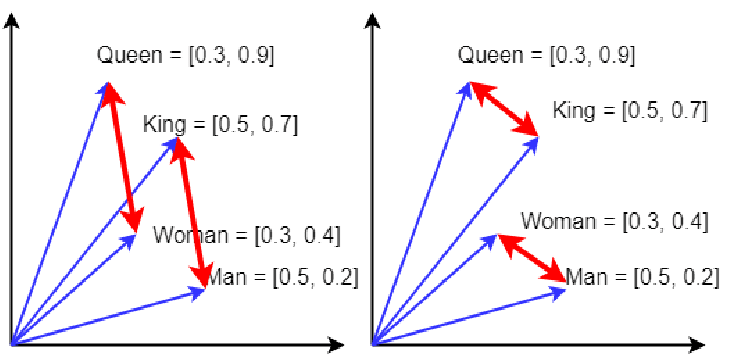

In [70]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Sample documents
documents = ["I love NLP", "NLP is fascinating", "I enjoy learning NLP", "AI is completely amazing", "Hi Carlo"]


# Sample documents and tokenization
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

# Train Word2Vec model
# vector_size defines the dimensionality of the word vectors.
# window is the context window size, and min_count sets the minimum frequency for a word to be included.
model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)

# Get vector for a specific word
vector = model.wv['nlp']
print(vector)


[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

In [71]:
# Get vector for a specific word
vector = model.wv['fascinating']
print(vector)

[ 7.0887972e-03 -1.5679300e-03  7.9474989e-03 -9.4886590e-03
 -8.0294991e-03 -6.6403709e-03 -4.0034545e-03  4.9892161e-03
 -3.8135587e-03 -8.3199050e-03  8.4117772e-03 -3.7470020e-03
  8.6086961e-03 -4.8957514e-03  3.9185942e-03  4.9220170e-03
  2.3926091e-03 -2.8188038e-03  2.8491246e-03 -8.2562361e-03
 -2.7655398e-03 -2.5911583e-03  7.2490061e-03 -3.4634031e-03
 -6.5997029e-03  4.3404270e-03 -4.7448516e-04 -3.5975564e-03
  6.8824720e-03  3.8723124e-03 -3.9002013e-03  7.7188847e-04
  9.1435025e-03  7.7546560e-03  6.3618720e-03  4.6673026e-03
  2.3844899e-03 -1.8416261e-03 -6.3712932e-03 -3.0181051e-04
 -1.5653884e-03 -5.7228567e-04 -6.2628710e-03  7.4340473e-03
 -6.5914928e-03 -7.2392775e-03 -2.7571463e-03 -1.5154004e-03
 -7.6357173e-03  6.9824100e-04 -5.3261113e-03 -1.2755442e-03
 -7.3651113e-03  1.9605684e-03  3.2731986e-03 -2.3138524e-05
 -5.4483581e-03 -1.7260861e-03  7.0849168e-03  3.7362587e-03
 -8.8810492e-03 -3.4135508e-03  2.3541022e-03  2.1380198e-03
 -9.4640078e-03  4.57116

Word2Vec, a word embedding technique, captures semantic relationships by converting words into continuous vectors, grouping similar words closer in the vector space based on context.

Above, we can see that the model learns a 100-dimensional vector representation for the word "NLP". This vector captures the word's semantic meaning and its relationships to other words in the training data

Looking at the whole matrix, each row in the matrix represents a document, and each column represents a word in the vocabulary. The values indicate the TF-IDF score for each word in each document. Words like "love" and "NLP" have higher scores in the documents where they are more important, while common words like "is" are downweighted.



<p><b>Word2Vec</b> is a popular word embedding technique that converts words into continuous vectors in a high-dimensional space, capturing their semantic meanings and relationships. Unlike traditional Bag-of-Words or TF-IDF methods, Word2Vec learns the context and semantics of words, grouping similar words closer together in the vector space.</p>

<p>Word2Vec was introduced by a team at Google led by Tomas Mikolov in 2013. It uses a shallow neural network model to learn word representations that are highly effective for capturing the context of words in a large corpus of text.</p>

<h3>How Does Word2Vec Work?</h3>
<p>Word2Vec comes in two main architectures:</p>
<ol>
    <li><b>Continuous Bag of Words (CBOW):</b> Predicts a target word based on its surrounding context words. It tries to guess the word in the middle given the words around it.</li>
    <li><b>Skip-gram:</b> Does the opposite of CBOW by predicting surrounding context words given a target word. It tries to predict the neighboring words given a single word.</li>
</ol>

<h3>Why Use Word2Vec?</h3>
<ul>
    <li><b>Captures Semantic Similarity:</b> Words that are similar in meaning (e.g., "king" and "queen") are positioned close to each other in the vector space.</li>
    <li><b>Mathematical Operations:</b> You can perform arithmetic operations with word vectors to find relationships. For example, <code>vector("king") - vector("man") + vector("woman") ≈ vector("queen")</code>.</li>
    <li><b>Reduces Dimensionality:</b> Converts sparse one-hot encoded vectors (with dimensions equal to vocabulary size) into dense vectors with lower dimensionality.</li>
</ul>

<h3>Understanding Word Embeddings</h3>
<p>In Word2Vec, each word is represented as a <b>dense vector</b> of fixed size (e.g., 100 or 300 dimensions) instead of a sparse, high-dimensional vector like in Bag-of-Words or TF-IDF.</p>


<p>Let’s say you have the words <i>"king"</i>, <i>"queen"</i>, <i>"man"</i>, and <i>"woman"</i>. Word2Vec learns that the vector difference between <i>"king"</i> and <i>"queen"</i> is similar to the difference between <i>"man"</i> and <i>"woman"</i>. This captures the relationship between these words.</p>

<p>We can also visually represent these vectors to show relationships between words. Imagine each word as a point in a high-dimensional space. Words like <i>"dog"</i> and <i>"cat"</i> are closer to each other, while words like <i>"dog"</i> and <i>"car"</i> are farther apart. The proximity of the points indicates semantic similarity.</p>

<h3>Resources:</h3>
<ul>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">TF-IDF in Scikit-Learn Documentation</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf">TF-IDF Explained on Wikipedia</a></li>
</ul>



In [72]:
import gensim.downloader as api

# Load a pre-trained GloVe model (trained on Wikipedia and Gigaword)
# glove_model = api.load("glove-wiki-gigaword-300")
# use this if the above is taking too long to load
glove_model = api.load("glove-wiki-gigaword-100")  # 100D GloVe model


# Check the similarity between words using GloVe
print("Similarity between 'king' and 'queen':", glove_model.similarity('king', 'queen'))
print("Similarity between 'king' and 'table':", glove_model.similarity('king', 'table'))
print("Result of 'king - man + woman':", glove_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

print("\nResults for 'tower':", glove_model.most_similar(positive=['tower'], topn=10))


Similarity between 'king' and 'queen': 0.7507691
Similarity between 'king' and 'table': 0.29662597
Result of 'king - man + woman': [('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473)]

Results for 'tower': [('towers', 0.8470372557640076), ('building', 0.725898027420044), ('dome', 0.6875219345092773), ('spire', 0.6807529926300049), ('gate', 0.671362578868866), ('skyscraper', 0.6699519753456116), ('roof', 0.6561244130134583), ('walls', 0.6556639075279236), ('built', 0.6550073623657227), ('buildings', 0.6522013545036316)]


GloVe (Global Vectors for Word Representation) is a powerful word embedding technique designed to capture the semantic meaning of words in a high-dimensional space. Developed by researchers at Stanford University in 2014, GloVe represents words as dense vectors, allowing them to be mathematically manipulated and compared. These embeddings are trained on large text corpora like Wikipedia or Twitter, and they reflect patterns of word co-occurrence, capturing complex semantic relationships such as analogies, similarities, and hierarchies.

The fundamental idea behind GloVe is to leverage the statistical properties of word co-occurrences in a given corpus. By analyzing how frequently words appear together, GloVe learns to place similar words—like king and queen—close to each other in the vector space, while keeping dissimilar words—like king and apple—further apart.

Key Features of GloVe:
- Captures Global Statistics: GloVe is based on a co-occurrence matrix that captures the global word-word co-occurrence statistics from a large corpus. This allows GloVe to build a more complete picture of word relationships.
- Efficient and Scalable: GloVe is computationally efficient and scales well to large datasets, making it suitable for training on billions of words.
- Semantic and Syntactic Relationships: GloVe captures both semantic and syntactic relationships between words.
- Pre-trained Embeddings: GloVe offers a variety of pre-trained models with different dimensions (50D, 100D, 200D, 300D) and trained on diverse datasets like Wikipedia, Common Crawl, and Twitter. This makes it easy to use without having to train the model from scratch.

GloVe is widely used in natural language processing tasks such as sentiment analysis, document classification, and word analogy solving. With its ability to transform words into meaningful numerical representations, GloVe has become a cornerstone in NLP and deep learning applications.

In [73]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

documents = [
    "The king is the ruler of the kingdom.",
    "The queen is the wife of the king and rules with him.",
    "The prince is the son of the king and queen.",
    "The princess is the daughter of the king and queen.",
    "The man is the husband of the woman.",
    "The woman is the wife of the man.",
    "The father is the male parent.",
    "The mother is the female parent.",
    "The brother is a male sibling.",
    "The sister is a female sibling.",
    "A king and queen are part of the royal family.",
    "The prince will become a king when he grows up.",
    "The princess might become a queen someday.",
    "The father takes care of his family.",
    "The mother nurtures her children and the family.",
    "The king leads the kingdom, and the queen supports him.",
    "A man can be a father, a husband, or a brother.",
    "A woman can be a mother, a wife, or a sister.",
    "A brother and sister share the same parents.",
    "A father and mother are the parents of a child.",
    "A king and a queen have royal children called prince and princess.",
    "A man and a woman can be part of a family.",
    "The king has authority, while the queen has grace.",
    "The prince has responsibilities, and the princess has charm.",
    "The brother helps his siblings, and the sister cares for them."
]

# Tokenize the documents
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

# Train a Word2Vec model with a custom dataset
model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)

# Get vector representation for the word 'king'
vector_king = model.wv['king']
print(f"Vector representation for 'king': \n{vector_king}\n")

# Example of vector arithmetic: "king - man + woman = queen"
result_analogy = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)
print(f"Result of 'king - man + woman': {result_analogy}\n")

# Example of hierarchical relationship: "prince - king + queen = princess"
result_prince_analogy = model.wv.most_similar(positive=['prince', 'queen'], negative=['king'], topn=10)
print(f"Result of 'prince - king + queen': {result_prince_analogy}\n")

# Example of sibling relationship: "brother - male + female = sister"
result_sibling_analogy = model.wv.most_similar(positive=['brother', 'female'], negative=['male'], topn=10)
print(f"Result of 'brother - male + female': {result_sibling_analogy}\n")


Vector representation for 'king': 
[ 8.1553562e-03 -4.3521477e-03 -1.0234099e-03  1.0569474e-03
 -1.7744693e-04  1.0527455e-03  6.2170932e-03  1.2638854e-04
 -3.3593473e-03 -1.6081687e-03  5.9247711e-03  1.3579360e-03
 -7.0278911e-04  9.3471343e-03 -4.8452346e-03 -8.5231767e-04
  9.2171533e-03  6.7525860e-03  1.3486083e-03 -9.0229558e-03
  1.2105126e-03 -2.2421847e-03  9.3989661e-03  1.1687482e-03
  1.4151222e-03  2.4316434e-03 -1.8763579e-03 -4.9759122e-03
  1.6704784e-04 -1.9939484e-03  6.6699963e-03  8.8238353e-03
 -6.2626804e-04  2.8025550e-03 -6.1160736e-03  1.7987301e-03
 -6.8191881e-03 -8.6566517e-03 -5.9595350e-03 -8.9866882e-03
  7.2887563e-03 -5.8882460e-03  8.2631195e-03 -7.1460549e-03
  3.5215798e-03  9.7260363e-03 -7.8784619e-03 -9.9888286e-03
 -4.3390919e-03 -2.6041397e-03 -1.7895648e-04 -8.9366771e-03
 -8.6700507e-03  2.6563923e-03 -8.2413470e-03 -9.0438137e-03
 -2.2390815e-03 -8.6171739e-03 -7.1373470e-03 -8.3933361e-03
 -3.5656034e-04 -4.5689167e-03  6.6227666e-03  1.5

# NLP Text Processing Pipeline with IMDB

In [74]:
import pandas as pd
import numpy as np

In [75]:
# GitHub URL for the CSV file
github_url = 'https://github.com/angelaaaateng/AIR_AI_Engineering_Course_2024/raw/refs/heads/main/Datasets/IMDB_Dataset.csv'

df = pd.read_csv(github_url, sep=',', on_bad_lines='skip')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [76]:
# Import necessary libraries

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Remove HTML tags and special characters
def preprocess_text(text):
  text = re.sub('<[^<]+?>', '', text) # Remove HTML tags
  text = re.sub('[^a-zA-Z0-9\\s]', '', text) # Remove special characters
  text = text.lower() # Convert to lowercase
  return text

# Apply preprocessing to the 'review' column
df['review']
df['review'] = df['review'].apply(preprocess_text)

df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [77]:
# Tokenization and Stop Word Removal
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
def remove_stopwords_and_tokenize(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df['review'] = df['review'].apply(remove_stopwords_and_tokenize)
df


,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


In [56]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df['review'] = df['review'].apply(lemmatize_tokens)
df


,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


In [78]:
df['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

In [79]:
from gensim.models import Word2Vec
# Train Word2Vec model using the pre-tokenized words
model = Word2Vec(sentences=df['review'], vector_size=100, window=5, min_count=1, workers=4)


In [80]:
model

In [81]:

# Function to get the average word vector for a review
def get_review_vector(tokenized_review):
    # Only include words that are in the Word2Vec model's vocabulary
    valid_words = [word for word in tokenized_review if word in model.wv.key_to_index]
    if valid_words:  # Check if there are any valid words
        # Calculate the mean of the word vectors
        return np.mean([model.wv[word] for word in valid_words], axis=0)
    else:
        # Return a zero vector if no valid words are found
        return np.zeros(model.vector_size)

# Apply the function to each row in the 'reviews' column
df['review_vector'] = df['review'].apply(lambda x: get_review_vector(x))

In [82]:
df

,review,sentiment,review_vector
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive,"[-0.10871375, 0.89937127, -0.5548881, -0.27845..."
1,"[wonderful, little, production, filming, techn...",positive,"[-0.016809644, 0.7808162, 0.15705621, -0.48628..."
2,"[thought, wonderful, way, spend, time, hot, su...",positive,"[-0.19255796, 0.8196453, -0.44099915, -0.43287..."
3,"[basically, theres, family, little, boy, jake,...",negative,"[-0.2560165, 0.8925612, -0.3407916, -0.4489883..."
4,"[petter, matteis, love, time, money, visually,...",positive,"[-0.19715327, 0.9320575, -0.3812619, -0.639354..."
...,...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive,"[-0.29255357, 1.1368846, -1.009172, -0.4604861..."
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative,"[-0.49820244, 0.76446337, -0.5302436, 0.080785..."
49997,"[catholic, taught, parochial, elementary, scho...",negative,"[-0.28607, 0.74096787, -0.36899704, -0.6993501..."
49998,"[im, going, disagree, previous, comment, side,...",negative,"[-0.36154753, 0.6182202, -0.08752244, -0.21329..."


In [83]:
# Function to determine if sentiment is positive or negative based on the mean of the vector
def determine_sentiment(vector):
    # If the mean of the vector is positive, classify as positive sentiment
    if np.mean(vector) > 0.05:
        return 'positive'
    else:
        return 'negative'

# Apply the sentiment determination function to each vector
df['predicted_sentiment'] = df['review_vector'].apply(lambda x: determine_sentiment(x))


In [84]:
df

,review,sentiment,review_vector,predicted_sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive,"[-0.10871375, 0.89937127, -0.5548881, -0.27845...",negative
1,"[wonderful, little, production, filming, techn...",positive,"[-0.016809644, 0.7808162, 0.15705621, -0.48628...",negative
2,"[thought, wonderful, way, spend, time, hot, su...",positive,"[-0.19255796, 0.8196453, -0.44099915, -0.43287...",negative
3,"[basically, theres, family, little, boy, jake,...",negative,"[-0.2560165, 0.8925612, -0.3407916, -0.4489883...",negative
4,"[petter, matteis, love, time, money, visually,...",positive,"[-0.19715327, 0.9320575, -0.3812619, -0.639354...",negative
...,...,...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive,"[-0.29255357, 1.1368846, -1.009172, -0.4604861...",negative
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative,"[-0.49820244, 0.76446337, -0.5302436, 0.080785...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative,"[-0.28607, 0.74096787, -0.36899704, -0.6993501...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative,"[-0.36154753, 0.6182202, -0.08752244, -0.21329...",negative


In [85]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [86]:
df['predicted_sentiment'].value_counts()

predicted_sentiment
negative    48310
positive     1690
Name: count, dtype: int64

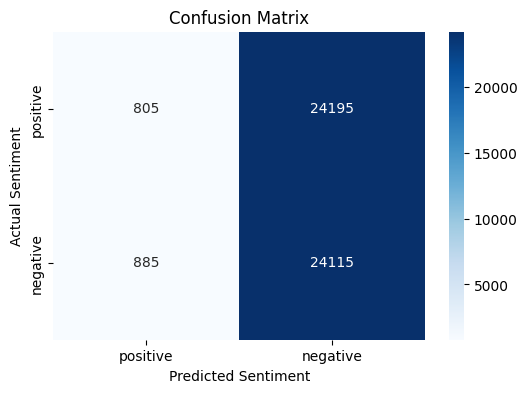

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# how can we make the model better? what else would you do?

# Get unique labels from the actual and predicted sentiment columns
unique_labels = list(set(df['sentiment'].unique()) | set(df['predicted_sentiment'].unique()))

# Create confusion matrix using the unique labels
conf_matrix = confusion_matrix(df['sentiment'], df['predicted_sentiment'], labels=unique_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_labels,  # Use dynamic labels
            yticklabels=unique_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

# HuggingFace Setup

In [88]:
!pip install transformers huggingface_hub


In [89]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
from huggingface_hub import login

# Authenticate with Hugging Face using the API token
# Replace 'your_huggingface_token' with your actual Hugging Face token
huggingface_token = ''
# login(token=huggingface_token)

# Define the model and tokenizer you want to use
model_name = "distilbert-base-uncased-finetuned-sst-2-english"  # Sentiment analysis model

# Load the model and tokenizer from the Hugging Face Hub
# This will use your authenticated token to access models
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a text classification pipeline
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device='cpu')

#Test the pipeline with sample texts
texts = [
    "I absolutely love the new design of your website!",
    "The service was really bad and I'm not happy with it."
]

# Perform sentiment analysis
results = classifier(texts)

# Print out the results
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']} (Confidence: {result['score']:.2f})\n")


Device set to use cpu


Text: I absolutely love the new design of your website!
Sentiment: POSITIVE (Confidence: 1.00)

Text: The service was really bad and I'm not happy with it.
Sentiment: NEGATIVE (Confidence: 1.00)

